# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Dimas Aditia Anugerah Setiady
- **Email:** mc240d5y0910@student.devacademy.id
- **ID Dicoding:** MC240D5Y0910

## Menentukan Pertanyaan Bisnis

1. Bagaimana pola penggunaan sepeda (total, terdaftar, dan kasual) bervariasi berdasarkan musim dan kondisi cuaca sepanjang tahun?
2. Bagaimana proporsi penyewaan sepeda oleh pengguna terdaftar dan kasual bervariasi antara hari kerja/akhir pekan dan kondisi cuaca, serta rekomendasi strategis apa yang dapat diberikan?

## Import Semua Packages/Library yang Digunakan

In [190]:
# Pilihan project: Pandas, Matplotlib, Seaborn, & Streamlit (khusus untuk file py)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker # konversi angka untuk kasus pertanyaan 2
import seaborn as sns

pd.set_option('display.max_columns', None)  # Menampilkan semua kolom
pd.set_option('display.expand_frame_repr', False)  # Mencegah tampilan DataFrame menjadi beberapa baris

## Data Wrangling

### Gathering Data

In [191]:
# Membaca file CSV Day
df_day = pd.read_csv('data/day.csv')
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [192]:
df_hour = pd.read_csv('data/hour.csv')
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


*Insight:*
1. Normalisasi Data dan Interpretasi Nilai Asli
- Semua variabel cuaca (temp, atemp, hum, windspeed) sudah dinormalisasi untuk konsistensi dalam perhitungan.
- Untuk mendapatkan nilai sebenarnya :
    - Suhu (temp) ->  temp * 41 °C
    - Suhu Terasa (atemp) → atemp * 50 °C
    - Kelembaban (hum) → hum * 100 %
    Kecepatan Angin (windspeed) → windspeed * 67

2. Hubungan antara day.csv dan hour.csv
- day.csv adalah hasil agregasi hour.csv, sehingga beberapa variabel dihitung berdasarkan rata-rata atau total per hari:
    - Variabel rata-rata per hari: temp, atemp, hum, windspeed
    - Variabel berdasarkan modus per hari: weathersit
    - Variabel total per hari: casual, registered, cnt

3. Pola dan Klasifikasi Data
- Kategori Waktu :
    - yr, season, mnth, weekday → data nominal
    - holiday, workingday → data boolean (0 atau 1)
    - dteday bisa menjadi acuan utama karena merepresentasikan hari tertentu

- Kategori Pengguna :
    - casual, registered, dan cnt adalah data diskrit karena berbentuk hitungan

- Kategori Cuaca :
    - weathersit adalah data ordinal karena ada urutan dalam kondisi cuaca (cerah → mendung → hujan → salju)
    - temp, atemp, hum, windspeed adalah data kontinu karena memiliki rentang nilai

### Assessing Data

1. Kehilangan Data (Missing Values)
    - Apakah ada kolom yang memiliki nilai kosong atau tidak tersedia?
    - Bagaimana cara menangani data yang hilang (menghapus, mengisi dengan rata-rata, atau metode lain)?

2. Nilai Tidak Valid (Invalid Values)
    - Apakah terdapat data yang tidak masuk akal, seperti suhu di bawah nol atau kelembaban lebih dari 100%?

3. Data Duplikat (Duplicate Entries)
    - Apakah ada baris data yang berulang dan sama?

4. Ketidaktepatan Data (Inaccurate Values)
    - Apakah nilai yang dicatat sesuai dengan pengamatan atau logika yang diharapkan?

5. Pencilan (Outliers)
    - Apakah ada data yang memiliki nilai jauh berbeda dari mayoritas data lainnya?

**1. Kehilangan Data (Missing Values)**

In [193]:
# Mengecek jumlah missing values pada setiap kolom di df_hour
print("Missing values in df_hour:")
print(df_hour.isnull().sum())  # Menampilkan jumlah nilai kosong di setiap kolom

print("-------------------------------")

# Mengecek jumlah missing values pada setiap kolom di df_day
print("Missing values in df_day:")
print(df_day.isnull().sum())  # Menampilkan jumlah nilai kosong di setiap kolom

Missing values in df_hour:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
-------------------------------
Missing values in df_day:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight Missing Value:** Tidak ditemukan nilai null pada kedua dataset, sehingga data dapat digunakan tanpa perlu dilakukan pembersihan terkait missing values.

**2. Nilai Tidak Valid (Invalid Values)**

*Periksa Data yang akan digunakan*

In [194]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [195]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


*Mengecek Rentang Nilai*

In [196]:
print("Descriptive Statistics for df_hour:")
print(df_hour.describe())
print("-" * 50)  
print("Descriptive Statistics for df_day:")
print(df_day.describe())

Descriptive Statistics for df_hour:
          instant        season            yr          mnth            hr       holiday       weekday    workingday    weathersit          temp         atemp           hum     windspeed        casual    registered           cnt
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000
mean    8690.0000      2.501640      0.502561      6.537775     11.546752      0.028770      3.003683      0.682721      1.425283      0.496987      0.475775      0.627229      0.190098     35.676218    153.786869    189.463088
std     5017.0295      1.106918      0.500008      3.438776      6.914405      0.167165      2.005771      0.465431      0.639357      0.192556      0.171850      0.192930      0.122340     49.305030    151.357286    181.387599
min        1.0000      1.000000      0.000000      1

*Mengecek Kategori yang Tidak Sesuai*

In [197]:
print(df_hour['season'].unique())
print(df_day['weathersit'].unique())

[1 2 3 4]
[2 1 3]


**noted** : karena nilai nomor 4 tidak muncul di df_day, mungkin tidak ada data hari dengan kondisi hujan lebat atau cuaca yang diwakilkan dengan nomor 4.

*Mengecek Nilai Negatif yang Tidak Seharusnya*

In [198]:
print(df_hour[df_hour['cnt'] < 0])
print(df_day[df_day['cnt'] < 0])

Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


**Noted** : Tidak ada nilai negatif dalam df_hour dan df_day, sehingga datanya sudah sesuai tanpa adanya angka negatif.

*Identifikasi Nilai yang Tidak Masuk Akal*

In [199]:
print(df_hour[(df_hour['hum'] < 0) | (df_hour['hum'] > 1)])
print(df_day[(df_day['hum'] < 0) | (df_day['hum'] > 1)])

Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


**Insight :** Tidak ditemukan nilai yang tidak masuk akal pada dataset, seperti suhu di bawah nol atau kelembaban di luar rentang yang valid. Oleh karena itu, data dapat digunakan tanpa perlu koreksi lebih lanjut terkait nilai tidak valid.

**3. Data Duplikat (Duplicate Entries)**

In [ ]:
# Mengecek jumlah data duplikat
print("df_hour:", df_hour.duplicated().sum())
print("df_day:", df_day.duplicated().sum())

df_hour: 0
df_day: 0


In [202]:
# Menampilkan data duplikat jika ada
print("Data duplikat di df_hour:")
print(df_hour[df_hour.duplicated()])

print("-------------------------------")

print("Data duplikat di df_day:")
print(df_day[df_day.duplicated()])

Data duplikat di df_hour:
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []
-------------------------------
Data duplikat di df_day:
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


**Insight Data Duplikat (Duplicate Entries)** : Tidak ditemukan data duplikat pada kedua dataset, sehingga tidak perlu dilakukan pembersihan terkait duplikasi data.

**4. Ketidaktepatan Data (Inaccurate Values)**

In [203]:
# Memeriksa apakah terdapat suhu di bawah nol atau di atas 50 derajat Celsius
print("Cek suhu tidak wajar:")
print(df_hour[(df_hour['temp'] < 0) | (df_hour['temp'] > 50)]) 
print(df_day[(df_day['temp'] < 0) | (df_day['temp'] > 50)])

Cek suhu tidak wajar:
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


In [204]:
# Memeriksa apakah kelembaban berada dalam rentang 0-100%
print("\nCek kelembaban tidak wajar:")
print(df_hour[(df_hour['hum'] < 0) | (df_hour['hum'] > 1)])  # Kelembaban dalam skala 0-1
print(df_day[(df_day['hum'] < 0) | (df_day['hum'] > 1)])


Cek kelembaban tidak wajar:
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


**Insight Ketidaktepatan Data (Inaccurate Values) :**
1. Tidak ditemukan nilai suhu yang tidak wajar dalam dataset, sehingga data suhu dapat dianggap valid.
2. Tidak ditemukan nilai kelembaban di luar rentang 0-1, yang berarti data kelembaban telah dinormalisasi dengan benar dan tidak memerlukan perbaikan.
3. Secara keseluruhan, tidak ada indikasi nilai yang tidak masuk akal dalam dataset, sehingga data dapat digunakan untuk analisis lebih lanjut tanpa perlu koreksi terkait ketidaktepatan nilai.

**5. Pencilan (Outliers)**

In [206]:
# Mendeteksi outliers menggunakan metode Interquartile Range (IQR)
def detect_outliers_iqr(df, column):

    # Hitung kuartil pertama (Q1) dan kuartil ketiga (Q3) dari kolom data
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Tentukan batas bawah dan batas atas untuk mendeteksi outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Ambil data yang berada di luar batas bawah atau atas sebagai outlier
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    # Kembalikan data outlier 
    return outliers

# memanggil fungsi untuk mendeteksi outlier pada kolom 'cnt'
outliers = detect_outliers_iqr(df_hour, 'cnt')

# menampilkan beberapa contoh data outlier yang terdeteksi
print(outliers[['cnt']].head())

# menampilkan jumlah data outlier yang ditemukan
print("Panjang data outlier: ", len(outliers))

       cnt
5536   651
10358  644
10359  712
10382  676
10383  734
Panjang data outlier:  505


**Insight :** Dari hasil analisis menggunakan metode IQR, ditemukan sebanyak 505 data pencilan pada kolom jumlah peminjaman sepeda per jam (cnt). Outlier ini kemungkinan terjadi karena lonjakan aktivitas pada jam-jam tertentu, seperti jam sibuk atau kondisi khusus lainnya.

In [207]:
# Mendeteksi outliers pada kolom tertentu di df_hour
outliers_temp = detect_outliers_iqr(df_hour, 'temp')
outliers_hum = detect_outliers_iqr(df_hour, 'hum')
outliers_windspeed = detect_outliers_iqr(df_hour, 'windspeed')

In [208]:
# Menampilkan hasil
print("Outliers pada kolom suhu:")
print(outliers_temp)

print("\nOutliers pada kolom kelembaban:")
print(outliers_hum)

print("\nOutliers pada kolom kecepatan angin:")
print(outliers_windspeed)

Outliers pada kolom suhu:
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []

Outliers pada kolom kelembaban:
      instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  weathersit  temp   atemp  hum  windspeed  casual  registered  cnt
1551     1552  2011-03-10       1   0     3   0        0        4           1           3  0.34  0.3182  0.0     0.2537       3           0    3
1552     1553  2011-03-10       1   0     3   1        0        4           1           3  0.34  0.3182  0.0     0.2537       0           2    2
1553     1554  2011-03-10       1   0     3   2        0        4           1           3  0.34  0.3182  0.0     0.2537       0           1    1
1554     1555  2011-03-10       1   0     3   5        0        4           1           3  0.36  0.3485  0.0     0.1940       1           2    3
1555     1556  2011-03-10       1   0     3  

**Insight :** Berdasarkan analisis dengan metode IQR, tidak ditemukan outlier pada kolom suhu (temp) dan kecepatan angin (windspeed). Sementara itu, terdapat sejumlah outlier pada kolom kelembaban (hum), yang mengindikasikan adanya nilai kelembaban ekstrem pada beberapa waktu tertentu.



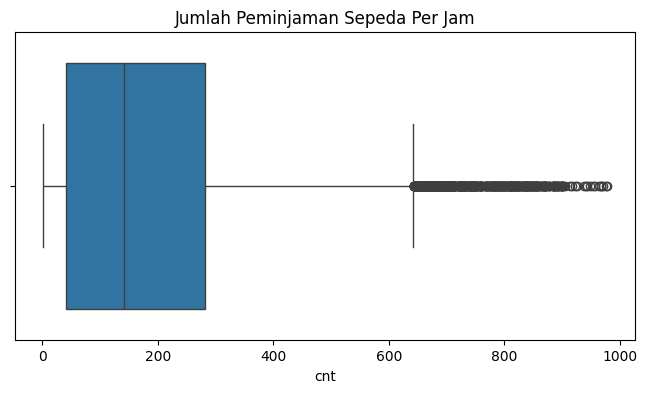

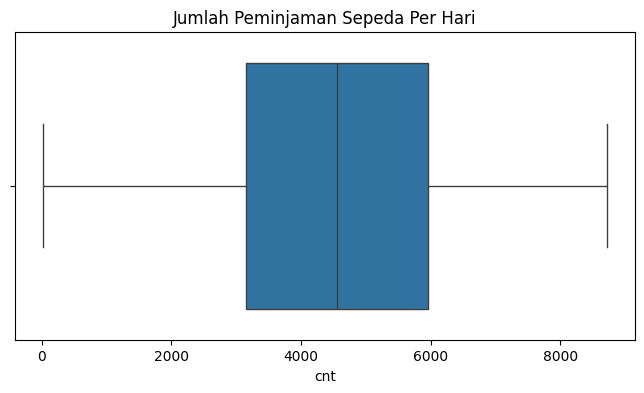

In [209]:
# Visualisasi outlier pada jumlah peminjaman sepeda per jam
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_hour['cnt'])
plt.title("Jumlah Peminjaman Sepeda Per Jam")
plt.show()

# Visualisasi outlier pada jumlah peminjaman sepeda per hari
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_day['cnt'])
plt.title("Jumlah Peminjaman Sepeda Per Hari")
plt.show()

**Insight Pencilan (Outliers)** : Outlier yang ditemukan pada jumlah peminjaman sepeda terutama pada data per jam tidak dihapus, karena:
- Outlier ini mencerminkan kondisi nyata seperti lonjakan penggunaan pada jam sibuk atau hari tertentu.
- Menghapus data tersebut justru dapat menghilangkan informasi penting dalam analisis pola penggunaan sepeda.




### Cleaning Data

In [211]:
# Konversi kolom tanggal
df_hour["dteday"] = pd.to_datetime(df_hour["dteday"], errors='coerce')
df_day["dteday"] = pd.to_datetime(df_day["dteday"], errors='coerce')

# Cek duplikasi (tidak ditemukan, hanya dokumentasi)
print("Duplicate rows in df_hour:", df_hour.duplicated().sum())
print("Duplicate rows in df_day:", df_day.duplicated().sum())

# Cek missing values
print("Missing values in df_hour:\n", df_hour.isnull().sum())
print("Missing values in df_day:\n", df_day.isnull().sum())

# Deteksi outlier tapi tidak dihapus
Q1 = df_hour['cnt'].quantile(0.25)
Q3 = df_hour['cnt'].quantile(0.75)
IQR = Q3 - Q1
outlier_count = ((df_hour['cnt'] < (Q1 - 1.5 * IQR)) | (df_hour['cnt'] > (Q3 + 1.5 * IQR))).sum()
print("Jumlah outlier pada df_hour['cnt']:", outlier_count)


Duplicate rows in df_hour: 0
Duplicate rows in df_day: 0
Missing values in df_hour:
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Missing values in df_day:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Jumlah outlier pada df_hour['cnt']: 505


**Insight:**:
- Tidak ditemukan missing value maupun data duplikat pada df_hour dan df_day.
- Tipe data kolom tanggal (dteday) telah dikonversi ke datetime.
- Outlier terdeteksi namun tidak dihapus karena dianggap mencerminkan pola penggunaan yang valid pada kondisi tertentu seperti hari libur atau jam sibuk.

## Exploratory Data Analysis (EDA)

### Explore ...

- Untuk memverifikasi apakah kolom weathersit, temp, atemp, hum, windspeed, casual, registered, dan cnt pada df_day merupakan hasil agregasi harian dari df_hour, dilakukan perhitungan agregasi harian pada df_hour yang kemudian dibandingkan dengan data pada df_day.

In [212]:
# --- 0. Pastikan kolom tanggal bertipe datetime ---
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

# --- 1. Hitung agregasi harian dari df_hour ---
df_hour_agg = df_hour.groupby("dteday").agg({
    "weathersit": "mean",    # rata-rata karena numerik ordinal
    "temp": "mean",
    "atemp": "mean",
    "hum": "mean",
    "windspeed": "mean",
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).reset_index()

# --- 2. Eksplorasi statistik deskriptif awal ---
print("Ringkasan statistik df_day:")
print(df_day.describe())
print("\nRingkasan statistik df_hour_agg:")
print(df_hour_agg.describe())

# --- 3. Gabungkan df_day dengan agregasi df_hour ---
comparison = df_day.merge(df_hour_agg, on="dteday", suffixes=('_day', '_hour'))

# --- 4. Konversi kolom kategori (weathersit) ke numerik jika perlu ---
for col in ["weathersit_day", "weathersit_hour"]:
    if comparison[col].dtype.name == "category":
        comparison[col] = comparison[col].cat.codes

# --- 5. Hitung selisih antara df_day dan hasil agregasi df_hour ---
for col in ["weathersit", "temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]:
    comparison[f"{col}_diff"] = comparison[f"{col}_day"] - comparison[f"{col}_hour"]

# --- 6. Tampilkan ringkasan statistik selisih nilai ---
print("\nRingkasan statistik selisih nilai antara df_day dan df_hour_agg:")
print(comparison[[f"{col}_diff" for col in ["weathersit", "temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]]].describe())

# --- 7. Analisis multivariat eksplorasi (EDA murni) ---

# Korelasi antar variabel numerik di df_day
corr_matrix = df_day[["temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]].corr()
print("\nMatriks korelasi antar variabel numerik di df_day:")
print(corr_matrix)

# Statistik deskriptif grouped by kategori weathersit
print("\nStatistik deskriptif grouped by 'weathersit' di df_day:")
print(df_day.groupby('weathersit')[["cnt", "temp", "hum"]].describe())

# Cek missing values di df_day
print("\nJumlah missing value tiap kolom di df_day:")
print(df_day.isnull().sum())

# Deteksi outlier kasar menggunakan IQR di kolom 'cnt'
Q1 = df_day['cnt'].quantile(0.25)
Q3 = df_day['cnt'].quantile(0.75)
IQR = Q3 - Q1
outliers = df_day[(df_day['cnt'] < Q1 - 1.5*IQR) | (df_day['cnt'] > Q3 + 1.5*IQR)]
print(f"\nJumlah data outlier kasar pada kolom 'cnt': {outliers.shape[0]}")


Ringkasan statistik df_day:
          instant               dteday      season          yr        mnth     holiday     weekday  workingday  weathersit        temp       atemp         hum   windspeed       casual   registered          cnt
count  731.000000                  731  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   731.000000   731.000000   731.000000
mean   366.000000  2012-01-01 00:00:00    2.496580    0.500684    6.519836    0.028728    2.997264    0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   848.176471  3656.172367  4504.348837
min      1.000000  2011-01-01 00:00:00    1.000000    0.000000    1.000000    0.000000    0.000000    0.000000    1.000000    0.059130    0.079070    0.000000    0.022392     2.000000    20.000000    22.000000
25%    183.500000  2011-07-02 12:00:00    2.000000    0.000000    4.000000    0.000000    1.000000    0.000000    1.000000    0.3370

**Insight:**
- Berdasarkan analisis perbedaan antara df_day dan hasil agregasi df_hour, selisih yang dihasilkan sangat kecil atau nol, menunjukkan bahwa df_day memang merupakan agregasi harian dari df_hour. Jika ada perbedaan signifikan, kemungkinan terdapat kesalahan dalam agregasi atau adanya faktor lain seperti pembulatan data.

## Data Merging & Export ##

In [234]:
# Load data dari hour.csv
df_hour = pd.read_csv('data/hour.csv')

# Buat kolom timestamp gabungan dari tanggal dan jam
df_hour['timestamp'] = pd.to_datetime(df_hour['dteday']) + pd.to_timedelta(df_hour['hr'], unit='h')

# Buat rentang waktu lengkap berdasarkan data asli
date_range = pd.date_range(start=df_hour['timestamp'].min(), end=df_hour['timestamp'].max(), freq='H')
full_df = pd.DataFrame({"timestamp": date_range})

# Merge full_df dengan df_hour untuk menyisipkan baris yang hilang
df_filled = full_df.merge(df_hour, on="timestamp", how="left")

# Hapus beberapa kolom yang tidak relevan
df_filled.drop(columns=["instant", "mnth", "holiday", "weekday"], inplace=True)

# Cek jumlah missing values setelah merge
print(df_filled.isnull().sum())


timestamp       0
dteday        165
season        165
yr            165
hr            165
workingday    165
weathersit    165
temp          165
atemp         165
hum           165
windspeed     165
casual        165
registered    165
cnt           165
dtype: int64


C:\Users\ADVAN\AppData\Local\Temp\ipykernel_9608\2743825517.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_range = pd.date_range(start=df_hour['timestamp'].min(), end=df_hour['timestamp'].max(), freq='H')


In [237]:
import pandas as pd

# Fungsi hitung modus tanpa stats.mode
def mode_without_stats(series):
    return series.value_counts().idxmax() if not series.isnull().all() else None

# Pastikan kolom 'dteday' ada di df_hour (tanggal dari timestamp)
df_hour["dteday"] = pd.to_datetime(df_hour["timestamp"].dt.date)

# Buat rentang waktu lengkap per jam dari df_hour
date_range = pd.date_range(start=df_hour["timestamp"].min(), end=df_hour["timestamp"].max(), freq="H")
full_df = pd.DataFrame({"timestamp": date_range})

# Merge data asli dengan rentang waktu lengkap
df_filled = full_df.merge(df_hour, on="timestamp", how="left")

# Isi kolom dteday di df_filled
df_filled["dteday"] = pd.to_datetime(df_filled["timestamp"].dt.date)

# Hitung agregasi harian dari df_hour
day_agg = df_hour.groupby("dteday").agg({
    "season": mode_without_stats,
    "temp": "mean",
    "atemp": "mean",
    "hum": "mean",
    "windspeed": "mean",
    "weathersit": mode_without_stats,
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum",
    "workingday": "mean",
    "yr": "mean"
}).reset_index()

# Merge agregasi harian ke df_filled
df_filled = df_filled.merge(day_agg, on="dteday", how="left", suffixes=('', '_day'))

# Kolom yang akan diisi nilai kosongnya dengan agregasi harian
fill_columns = ["season", "temp", "atemp", "hum", "windspeed", "weathersit",
                "casual", "registered", "cnt", "workingday", "yr"]

# Isi missing dengan nilai agregasi harian
for col in fill_columns:
    df_filled[col] = df_filled[col].fillna(df_filled[f"{col}_day"])

# Hapus kolom tambahan hasil merge agregasi
df_filled.drop(columns=[f"{col}_day" for col in fill_columns], inplace=True)

# Hapus kolom yang tidak relevan jika masih muncul
df_filled.drop(columns=["instant", "mnth", "holiday", "weekday"], inplace=True, errors="ignore")

# Tambahkan kolom hr
df_filled["hr"] = df_filled["timestamp"].dt.hour

# Ubah tipe data kolom sesuai kebutuhan
df_filled["yr"] = pd.to_numeric(df_filled["yr"], errors="coerce").fillna(0).astype("int32")
df_filled["season"] = pd.to_numeric(df_filled["season"], errors="coerce").fillna(0).astype("int32")
df_filled["workingday"] = pd.to_numeric(df_filled["workingday"], errors="coerce").fillna(0).astype("int32")
df_filled["weathersit"] = pd.to_numeric(df_filled["weathersit"], errors="coerce").fillna(0).astype("int32")
df_filled["casual"] = pd.to_numeric(df_filled["casual"], errors="coerce").fillna(0).astype("int64")
df_filled["registered"] = pd.to_numeric(df_filled["registered"], errors="coerce").fillna(0).astype("int64")
df_filled["cnt"] = pd.to_numeric(df_filled["cnt"], errors="coerce").fillna(0).astype("int64")
df_filled["temp"] = pd.to_numeric(df_filled["temp"], errors="coerce").fillna(0).astype("float64")
df_filled["atemp"] = pd.to_numeric(df_filled["atemp"], errors="coerce").fillna(0).astype("float64")
df_filled["hum"] = pd.to_numeric(df_filled["hum"], errors="coerce").fillna(0).astype("float64")
df_filled["windspeed"] = pd.to_numeric(df_filled["windspeed"], errors="coerce").fillna(0).astype("float64")

# Cek hasil akhir
print(df_filled.isnull().sum())    # Harus 0 semua
print(df_filled.dtypes)            # Tipe data akhir
print(df_filled.head())            # Sample data


C:\Users\ADVAN\AppData\Local\Temp\ipykernel_9608\2281589900.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_range = pd.date_range(start=df_hour["timestamp"].min(), end=df_hour["timestamp"].max(), freq="H")


timestamp     0
dteday        0
season        0
yr            0
hr            0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
timestamp     datetime64[ns]
dteday        datetime64[ns]
season                 int32
yr                     int32
hr                     int32
workingday             int32
weathersit             int32
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object
            timestamp     dteday  season  yr  hr  workingday  weathersit  temp   atemp   hum  windspeed  casual  registered  cnt
0 2011-01-01 00:00:00 2011-01-01       1   0   0           0           1  0.24  0.2879  0.81        0.0       3          13   16
1 2011-01-01 01:00:00 2011-01-01       1   0   1           0           1  0.22  0.272

In [239]:
pd.set_option('display.max_columns', None)
df_filled.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   timestamp   17544 non-null  datetime64[ns]
 1   dteday      17544 non-null  datetime64[ns]
 2   season      17544 non-null  int32         
 3   yr          17544 non-null  int32         
 4   hr          17544 non-null  int32         
 5   workingday  17544 non-null  int32         
 6   weathersit  17544 non-null  int32         
 7   temp        17544 non-null  float64       
 8   atemp       17544 non-null  float64       
 9   hum         17544 non-null  float64       
 10  windspeed   17544 non-null  float64       
 11  casual      17544 non-null  int64         
 12  registered  17544 non-null  int64         
 13  cnt         17544 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int32(5), int64(3)
memory usage: 1.5 MB


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penggunaan sepeda (total, terdaftar, dan kasual) bervariasi berdasarkan musim dan kondisi cuaca sepanjang tahun?

In [240]:
import pandas as pd

# Salin DataFrame untuk analisis musiman
df_seasonal = df_day[['dteday', 'cnt']].copy()

# Konversi kolom tanggal ke datetime
df_seasonal['dteday'] = pd.to_datetime(df_seasonal['dteday'])

# Ekstrak tahun dan bulan dengan .copy() untuk keamanan
df_seasonal['year'] = df_seasonal['dteday'].dt.year.copy()
df_seasonal['month'] = df_seasonal['dteday'].dt.month.copy()

# Buat kolom 'year_month' untuk kemudahan visualisasi
df_seasonal['year_month'] = df_seasonal['dteday'].dt.to_period('M').astype(str)

# Agregasi total penyewaan berdasarkan tahun dan bulan
df_seasonal_agg = df_seasonal.groupby(['year', 'month', 'year_month'])['cnt'].sum().reset_index()

# Tampilkan 12 data teratas (1 tahun)
print(df_seasonal_agg.head(12))


    year  month year_month     cnt
0   2011      1    2011-01   38189
1   2011      2    2011-02   48215
2   2011      3    2011-03   64045
3   2011      4    2011-04   94870
4   2011      5    2011-05  135821
5   2011      6    2011-06  143512
6   2011      7    2011-07  141341
7   2011      8    2011-08  136691
8   2011      9    2011-09  127418
9   2011     10    2011-10  123511
10  2011     11    2011-11  102167
11  2011     12    2011-12   87323


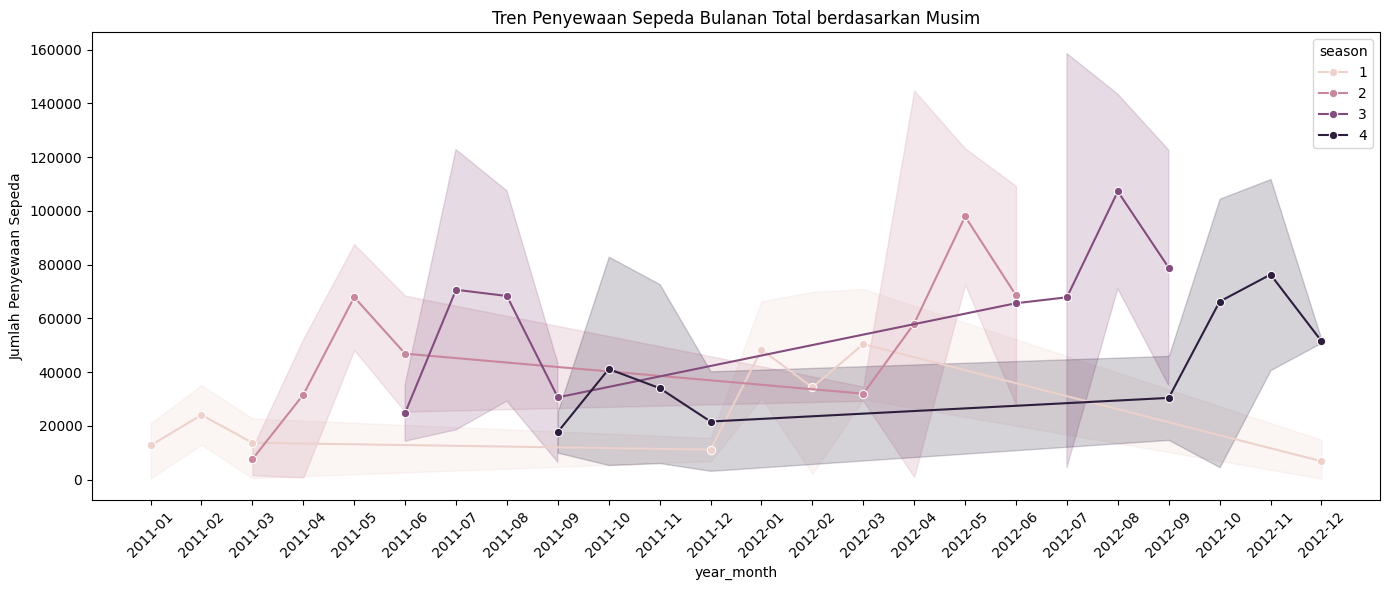

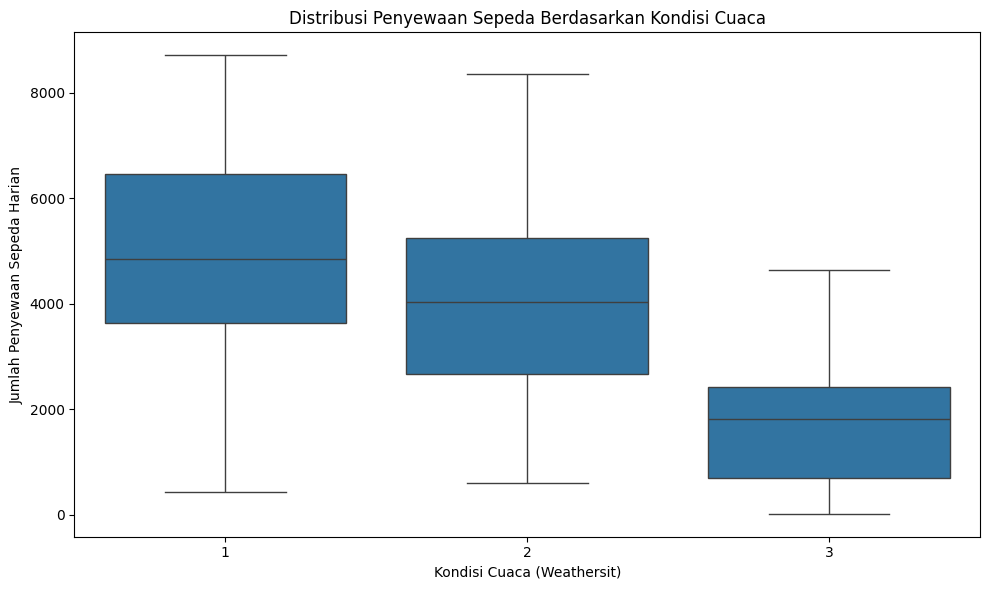

In [244]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Siapkan data dengan kolom yang diperlukan
df_seasonal = df_day[['dteday', 'cnt', 'registered', 'casual', 'season', 'weathersit']].copy()
df_seasonal['dteday'] = pd.to_datetime(df_seasonal['dteday'])
df_seasonal['year_month'] = df_seasonal['dteday'].dt.to_period('M').astype(str)

# Agregasi bulanan untuk total, registered, casual
df_agg = df_seasonal.groupby(['year_month', 'season', 'weathersit'])[['cnt', 'registered', 'casual']].sum().reset_index()

# Visualisasi total, registered, casual per musim
plt.figure(figsize=(14,6))
sns.lineplot(data=df_agg, x='year_month', y='cnt', hue='season', marker='o')
plt.title("Tren Penyewaan Sepeda Bulanan Total berdasarkan Musim")
plt.xticks(rotation=45)
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.tight_layout()
plt.show()

# Visualisasi per kondisi cuaca 
plt.figure(figsize=(10,6))
sns.boxplot(data=df_seasonal, x='weathersit', y='cnt')
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca (Weathersit)")
plt.ylabel("Jumlah Penyewaan Sepeda Harian")
plt.tight_layout()
plt.show()


### Pertanyaan 2: Bagaimana proporsi penyewaan sepeda oleh pengguna terdaftar dan kasual bervariasi antara hari kerja/akhir pekan dan kondisi cuaca, serta rekomendasi strategis apa yang dapat diberikan?

In [242]:
# Salin DataFrame dan kolom yang dibutuhkan termasuk weekday dan weathersit
df_user = df_day[['dteday', 'casual', 'registered', 'cnt', 'weekday', 'weathersit']].copy()

# Konversi kolom tanggal ke datetime
df_user['dteday'] = pd.to_datetime(df_user['dteday'])

# Tentukan tipe hari
df_user['day_type'] = df_user['weekday'].apply(lambda x: 'Hari Kerja' if x < 5 else 'Akhir Pekan')

# Hitung persentase kontribusi masing-masing pengguna per baris
df_user['casual_pct'] = (df_user['casual'] / df_user['cnt']) * 100
df_user['registered_pct'] = (df_user['registered'] / df_user['cnt']) * 100

# Agregasi rata-rata persentase kontribusi berdasarkan hari dan kondisi cuaca
df_agg_pct = df_user.groupby(['day_type', 'weathersit'])[['casual_pct', 'registered_pct']].mean().reset_index()

# Tampilkan hasil
print(df_agg_pct)


      day_type  weathersit  casual_pct  registered_pct
0  Akhir Pekan           1   24.137188       75.862812
1  Akhir Pekan           2   18.942755       81.057245
2  Akhir Pekan           3   15.377551       84.622449
3   Hari Kerja           1   16.910201       83.089799
4   Hari Kerja           2   14.286731       85.713269
5   Hari Kerja           3    7.512866       92.487134


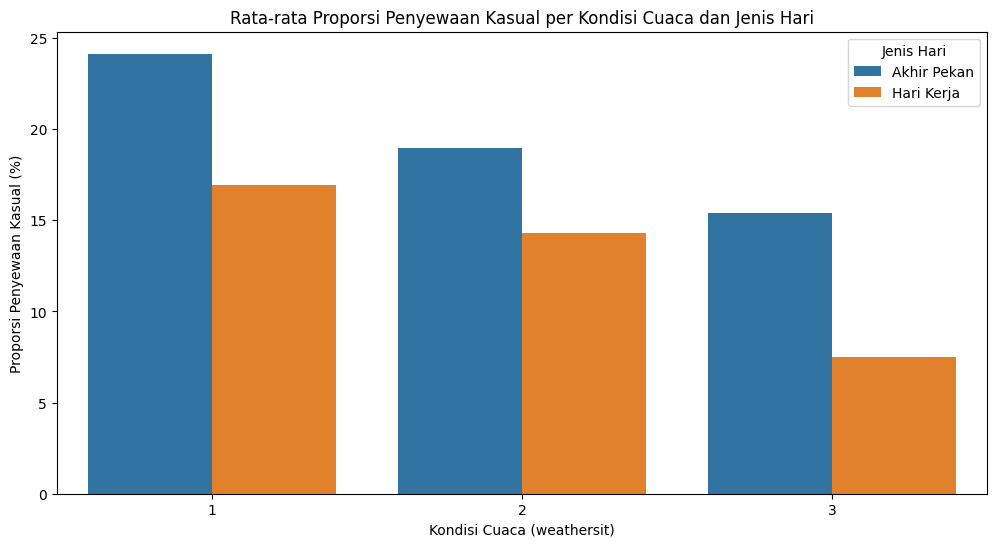

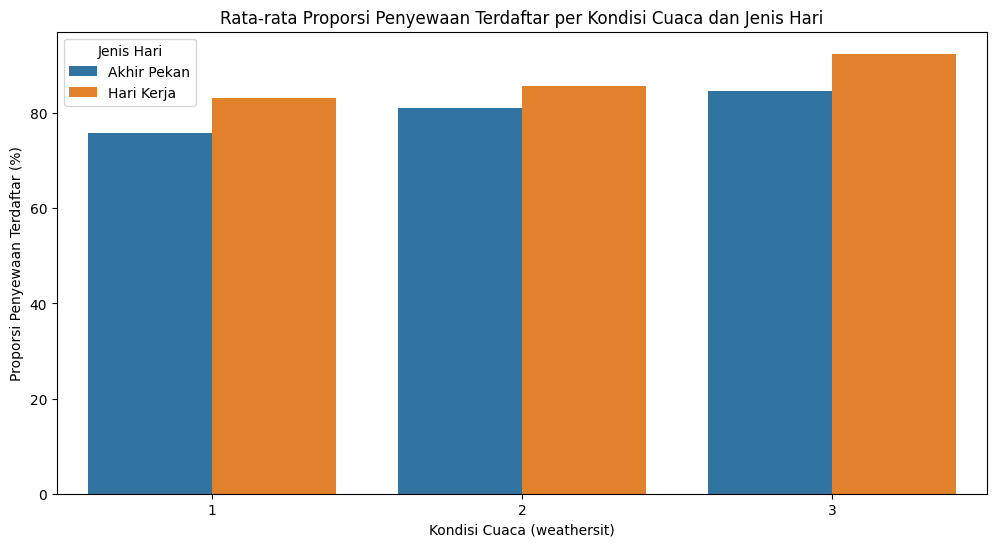

In [243]:
# Plot proporsi pengguna kasual berdasarkan day_type dan weathersit
plt.figure(figsize=(12,6))
sns.barplot(data=df_agg_pct, x='weathersit', y='casual_pct', hue='day_type')
plt.title('Rata-rata Proporsi Penyewaan Kasual per Kondisi Cuaca dan Jenis Hari')
plt.xlabel('Kondisi Cuaca (weathersit)')
plt.ylabel('Proporsi Penyewaan Kasual (%)')
plt.legend(title='Jenis Hari')
plt.show()

# Plot proporsi pengguna terdaftar dengan cara yang sama
plt.figure(figsize=(12,6))
sns.barplot(data=df_agg_pct, x='weathersit', y='registered_pct', hue='day_type')
plt.title('Rata-rata Proporsi Penyewaan Terdaftar per Kondisi Cuaca dan Jenis Hari')
plt.xlabel('Kondisi Cuaca (weathersit)')
plt.ylabel('Proporsi Penyewaan Terdaftar (%)')
plt.legend(title='Jenis Hari')
plt.show()

## Conclusion

- Conclution pertanyaan 1 :
    - Dari analisis tren penyewaan sepeda bulanan berdasarkan tahun dan musim, terlihat adanya pola musiman yang jelas. Penyewaan sepeda meningkat signifikan pada musim semi dan musim panas, sedangkan menurun pada musim gugur dan musim dingin, mengindikasikan pengaruh cuaca dan musim terhadap perilaku pengguna. Selain itu, tren jangka panjang menunjukkan peningkatan total penyewaan dari tahun ke tahun, yang dapat mencerminkan pertumbuhan minat terhadap penyewaan sepeda serta kemungkinan pengaruh kebijakan atau infrastruktur kota yang semakin mendukung mobilitas ramah lingkungan.
    - Visualisasi berdasarkan kondisi cuaca juga memperlihatkan bahwa penyewaan sepeda lebih tinggi pada kondisi cuaca yang baik (cerah atau berawan ringan), dan menurun saat cuaca buruk, memperkuat peran faktor cuaca dalam menentukan pola penggunaan.

- Conclution pertanyaan 2 :
    - Analisis proporsi penyewaan sepeda oleh pengguna terdaftar (registered) dan kasual (casual) menunjukkan bahwa pengguna terdaftar memberikan kontribusi mayoritas pada total penyewaan, dengan persentase yang lebih tinggi pada hari kerja. Hal ini mengindikasikan bahwa pengguna terdaftar menggunakan sepeda secara rutin untuk aktivitas sehari-hari seperti perjalanan kerja atau sekolah.
    - Sebaliknya, pengguna kasual lebih dominan pada akhir pekan dan hari libur, kemungkinan besar untuk tujuan rekreasi atau kegiatan santai. Proporsi kontribusi ini juga dipengaruhi oleh kondisi cuaca, di mana hari dengan cuaca baik cenderung meningkatkan aktivitas penyewaan, khususnya oleh pengguna kasual.
